# SVM on cancer dataset


In [1]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
cancer_data['data'].shape


(569, 30)

In [3]:
cancer_data['data'][5]

array([1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01, 1.700e-01,
       1.578e-01, 8.089e-02, 2.087e-01, 7.613e-02, 3.345e-01, 8.902e-01,
       2.217e+00, 2.719e+01, 7.510e-03, 3.345e-02, 3.672e-02, 1.137e-02,
       2.165e-02, 5.082e-03, 1.547e+01, 2.375e+01, 1.034e+02, 7.416e+02,
       1.791e-01, 5.249e-01, 5.355e-01, 1.741e-01, 3.985e-01, 1.244e-01])

In [4]:
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
cancer_data['target_names']
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data=cancer_data['data'],columns=cancer_data['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# training the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target,random_state=1,test_size=.3)

In [8]:
# importing svm classifier
from sklearn import svm
#creating a classifier
clf = svm.SVC(kernel='linear',gamma='auto')
#fitting the model
clf.fit(X_train,y_train)


SVC(gamma='auto', kernel='linear')

In [9]:
#predicting the response
pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy score: ",metrics.accuracy_score(y_test,y_pred=pred)) 
#precision is out of all predicted positives(have cancer, doesn't have cancer), how many are correctly predicted (TP/(TP+FP))
print("Precision score: ",metrics.precision_score(y_test,y_pred=pred))
# recall is (TP/Total predicted positive) out of all the person having cancer how many are correctly predicted
print("Recall score: ",metrics.recall_score(y_test,y_pred=pred))

print("Classification report:\n" , metrics.classification_report(y_test,y_pred=pred))

Accuracy score:  0.9532163742690059
Precision score:  0.9464285714285714
Recall score:  0.9814814814814815
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



<Axes: >

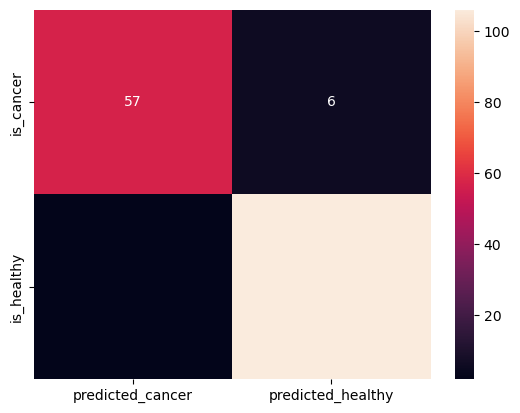

In [10]:
from sklearn.metrics import confusion_matrix
cm = np.array(confusion_matrix(y_test,pred))
cf = pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
import seaborn as sns
sns.heatmap(cf,annot=True)
